In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook 

In [2]:
nx=41
L=2.0
dx=L/(nx-1)
nt=50
dt=0.02
c=1.0
x=np.linspace(0.0, L, num=nx)

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('dark_background')

In [5]:
u0=np.ones(nx)

In [6]:
mask=np.where(np.logical_and(x>=0.5, x<=1.0))
mask

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=int64),)

In [7]:
u0[mask]=2.0
u0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [8]:
#plt.plot(x, u0, label='Initial Conditions', linestyle='--', linewidth='6')

u_values=[]
u=np.empty((nt, nx))
u[0]=u0
ux=np.ones((nx))
for n in range (1, nt):
    for i in range (1, nx):
        ux[i] = u[n-1,i] - c * dt / dx * (u[n-1,i] - u[n-1,i - 1])
    u[n,:]=ux
    

u=u0.copy()
for n in range (1, nt):
    un=u.copy()
    for i in range (1, nx):
        u[i]=un[i]-c*dt/dx*(un[i]-un[i-1])

plt.plot(x, u0, label='Initial Conditions', linestyle='--', linewidth='6')
plt.plot(x, u[20,:], label='Initial Conditions', linestyle='--', linewidth='6')

def animate(i):
    plt.cla()
    plt.plot(x, u[i,:], linewidth=6)
    
ani=FuncAnimation(plt.gcf(), animate, interval=100)
plt.tight_layout()
plt.show()

In [9]:
u1_values=[]
u1=np.empty((nt, nx))
u1[0]=u0
u1x=np.ones((nx))
for n in range (1, nt):
    for i in range (1, nx):
        u1x[i] = u1[n-1,i] - u1[n-1, i] * dt / dx * (u1[n-1,i] - u1[n-1,i - 1])
    u1[n,:]=u1x

<IPython.core.display.Javascript object>


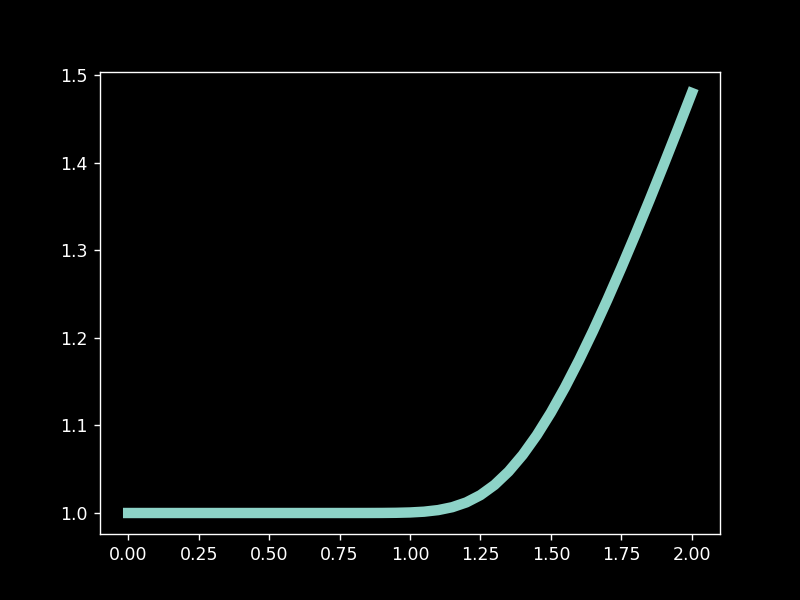

In [10]:
def animate(i):
    plt.cla()
    plt.plot(x, u1[i,:], linewidth=6)
    
ani=FuncAnimation(plt.gcf(), animate, interval=1000)
plt.tight_layout()
plt.show()